# Loan Prediction Problem

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

The following problem statement is about loan prediction. It is basically a classification problem as we have to predict whether someone who is applying for loan is able to pay back loan amount it means we have to decide we can give loan or not based on previous history, income factor and many other.

In [2]:
train = pd.read_csv('C:/Users/Asus/Downloads/train.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test = pd.read_csv('C:/Users/Asus/Downloads/test.csv')

In [5]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


Here are some factors which i think can affect the loan approval i.e dependent variable for this problem

1) salary : Applicants with high salary should have more chances to get loan approval 

2) Previous history : Applicants who have payed thier previous loans should have more chances of getting loan 

3) Loan amount : Loan approval should also depend on loan amount. If the loan amount is less and can be easily payble back then there should high chances of approval. 

4) Loan term : loan for less time period and less amount should have more priority of getting loan approved

In [6]:
train_original = train.copy()
test_original = test.copy()

In [7]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In train dataset we have 12 independent varibales and one target variable i.s Loan_Status. similarly in test dataset we have 12 independent variables except target variable i.e Loan_Status. we will predict Loan_Status by building model using train dataset.

In [9]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

here we see there are three data types in train dataset. 

1) Object : Object datatype means its a categorical variable.Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status are categorical variables in our train dataset. 
    
2) int64 : It represents the integer variables i.e ApplicantIncome. 
    
3) Float64 : It represents variablr which have some decimal value with numeric value. i.e CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History.


In [10]:
train.shape, test.shape

((614, 13), (367, 12))

we have 614 rows and 13 columns in train dataset and 367 rows and 12 columns in test dataset.



### Univariate Analysis

### Target variable

We will first take target variable into consideration i.e Loan_Status as it is a categorical variable, lets find its frequency of values and bar plot

In [11]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [12]:
train['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

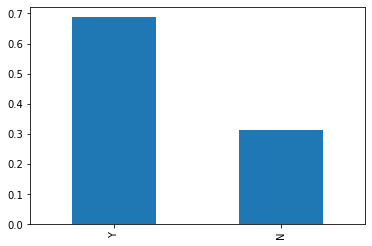

In [13]:
train['Loan_Status'].value_counts(normalize = True).plot.bar()

Out of 614 people 422 (around 69%) people get the loan and 192 (around 31%) do not get the loan.

### Independent (categorical) variable

Now lets visualise each and every categorical variable seperately.

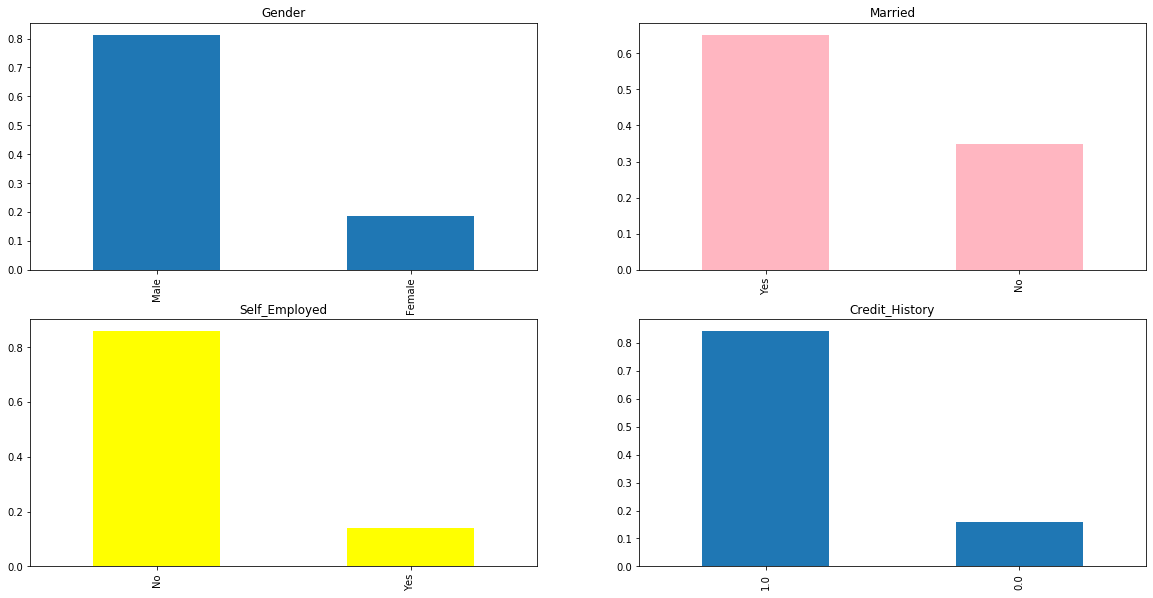

In [14]:
plt.subplot(2,2,1)
train['Gender'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'Gender')
plt.subplot(2,2,2)
train['Married'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'Married', color = 'Lightpink')
plt.subplot(2,2,3)
train['Self_Employed'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'Self_Employed', color = 'yellow')
plt.subplot(2,2,4)
train['Credit_History'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'Credit_History')

It can be infered form the above bar plots that: 

1) Around 80% of applicants in dataset are male 

2) near about 65% applicants are married 

3) Around 18% of applicants in our dataset are self employed. 

4) 85% of applicants repaid their previous loan amount.



### Independent (ordinal) variable 

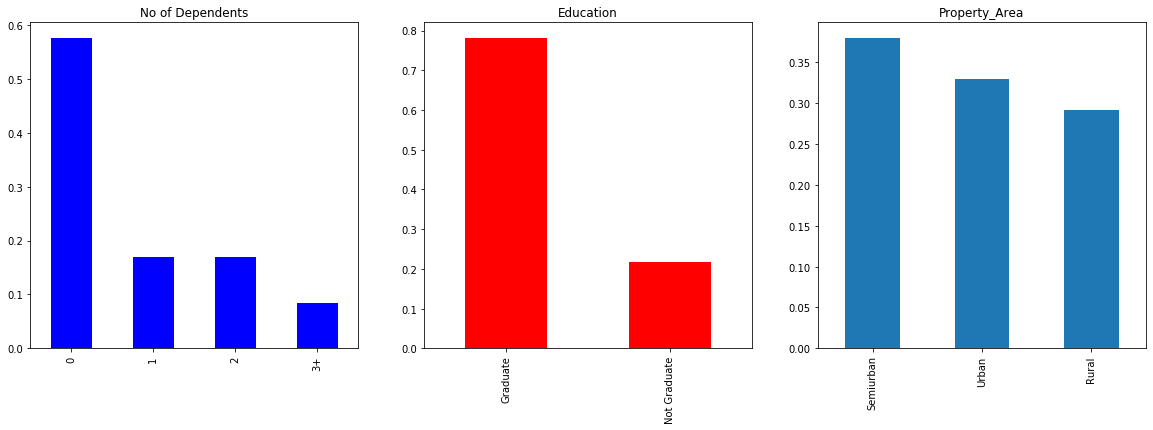

In [15]:
plt.subplot(1,3,1)
train['Dependents'].value_counts(normalize = True).plot.bar(figsize = (20,6), title = 'No of Dependents', color = 'Blue')
plt.subplot(1,3,2)
train['Education'].value_counts(normalize = True).plot.bar(figsize = (20,6), title = 'Education', color = 'Red')
plt.subplot(1,3,3)
train['Property_Area'].value_counts(normalize = True).plot.bar(figsize = (20,6), title = 'Property_Area')

Following inference can be made from the above plots : 

1) Most of the applicants don't have any dependents (around 58%) 

2) Around 80% applicants are graduated. 3) Most of the applicants are from semi-urban area.

### Independent (numerical) variable 

Till now ew have visualise categorical and ordinal variables, now lets visulaise numerical variable and try to find out whether they follow guassian distribution or not by using distplot

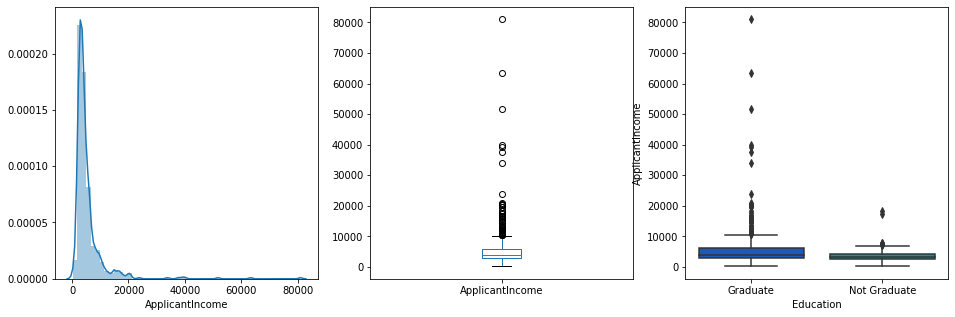

In [16]:
plt.subplot(1,3,1)
sns.distplot(train['ApplicantIncome'])
plt.subplot(1,3,2)
train['ApplicantIncome'].plot.box(figsize = (16,5))
plt.subplot(1,3,3)
sns.boxplot(x = 'Education', y = 'ApplicantIncome', data = train, palette = 'winter')

It is observed that this data is right skewed which means it does not follow normal distribution. And from boxplot we can conclude that there are lot of outliers in the data now we will segregate them by education to get clear idea about income of applicant. here we can see that there are higher number of graduates with very high income which are outliers. Now lets look at other numerical variables i.e CoapplicantIncome and Loan Amount.

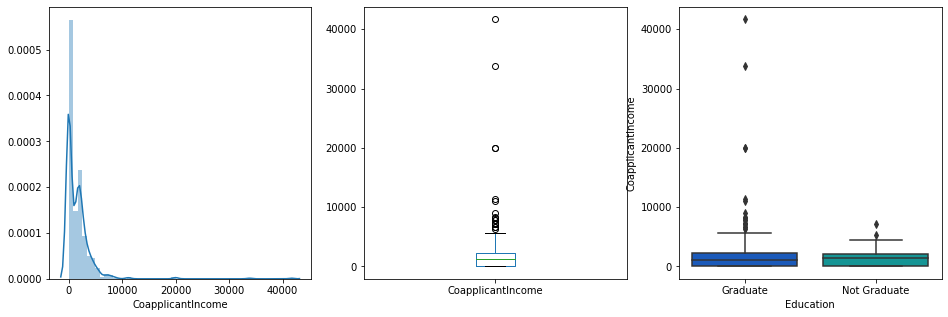

In [17]:
plt.subplot(1,3,1)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(1,3,2)
train['CoapplicantIncome'].plot.box(figsize = (16,5))
plt.subplot(1,3,3)
sns.boxplot(x = 'Education', y = 'CoapplicantIncome', data = train, palette = 'winter')

We see a similar type of distribution in Coapllicant Income as that of Applicant Income. Maximum coapplicant's income lies between 0-5000 and also there are more graduates with higher income which are outliers similar to apllicant income.

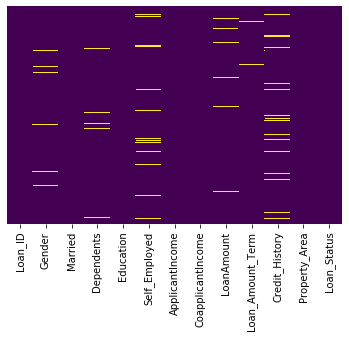

In [18]:
train['LoanAmount'].isnull().sum()
sns.heatmap(train.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

Here in this heatmap we can see that there are lot of missing values in our data. The yellow ticks in the heatmap shows missing values in that particular column of our dataset.

##  Bivariate Analysis 

After looking at every variable individually in univariate analysis, we will now explore them again with respect to target variable in bivariate analysis.



### Categorical independent variable vs target variable 

First of all we will try to find out relation between target variable and categorical variables with the help of stacked bar plot which will give the proportion of approved and not approved loans.

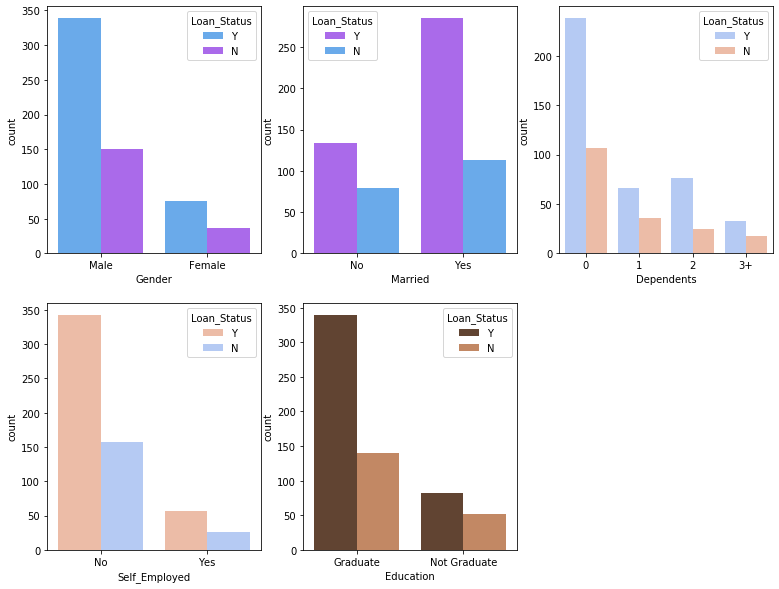

In [19]:
plt.figure(figsize = (13,10))
plt.subplot(2,3,1)
sns.countplot(x = 'Gender', hue = 'Loan_Status', data = train, palette = 'cool')
plt.subplot(2,3,2)
sns.countplot(x = 'Married', hue = 'Loan_Status', data = train, palette = 'cool_r')
plt.subplot(2,3,3)
sns.countplot(x = 'Dependents', hue = 'Loan_Status', data = train, palette = 'coolwarm')
plt.subplot(2,3,4)
sns.countplot(x = 'Self_Employed', hue = 'Loan_Status', data = train, palette = 'coolwarm_r')
plt.subplot(2,3,5)
sns.countplot(x = 'Education', hue = 'Loan_Status', data = train, palette = 'copper')

From the above plots we can infered as: 

1)Proportion of male applicants is more than proportion of female applicants for both approved and not approved loan. 

2)Similarly proportion of married applicants is higher for approved loan. 

3)Distribution of number of dependents on applicant is more for no dependent in case of approved loan. 

4)Applicants who are self employed are higher for approved loan. 

5)In terms of education, graduated applicants are higher vs Loan Status.

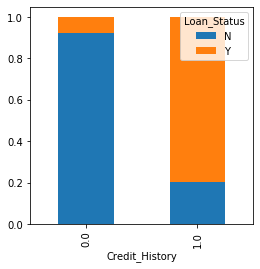

In [20]:
credit_hist = pd.crosstab(train['Credit_History'], train['Loan_Status'])
prop_area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
credit_hist.div(credit_hist.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))

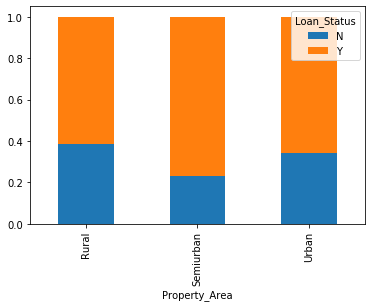

In [21]:
prop_area.div(prop_area.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)

It can be stated by above bar charts as : 

1) applicants who reapid their previous credit history are seems to get loan approved. 
    
2) Near about 75% of applicants who have approved loan are form semiurban area.

### numerical independent variable vs target variable 

Text(0.5, 1.0, 'ApplicantIncome vs Loan_status')

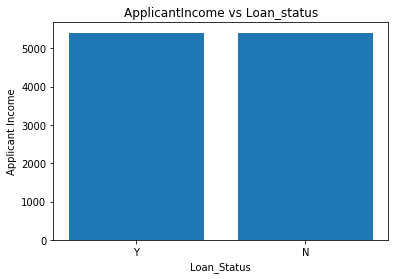

In [22]:
x = train['Loan_Status']
y = train['ApplicantIncome'].mean()
plt.bar(x,y)
plt.xlabel('Loan_Status')
plt.ylabel('Applicant Income')
plt.title('ApplicantIncome vs Loan_status')

Here we see, there is no difference in y-axis values as we take mean of applicant income on y-axis. Now lets make bins for applicant income variable based on values in it and analyse correseponding loan status for each bin.



Text(0, 0.5, 'Percentage')

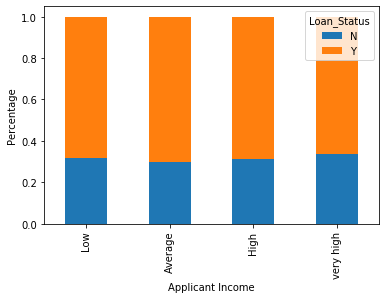

In [23]:
## We check whether loan approvel is affected by applicant income.
### Here we divide whole income into five groups.'

bins = [0,2500,4000,6000,81000]
group = ['Low', 'Average', 'High', 'very high']
train['Income_bin'] = pd.cut(train['ApplicantIncome'], bins, labels = group)
Income_bin = pd.crosstab (train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.xlabel('Applicant Income')
plt.ylabel('Percentage')

It can be infered as applicant income does not affect loan status which contradicts our assumption, in hypothesis we assumed that there is more chances of getting loan apporved if the applicantincome is high. Similarly we analyse coapplicant income and loan status.

Text(0, 0.5, 'Percentage')

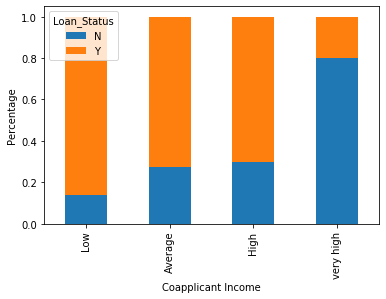

In [24]:
## We check whether loan approvel is affected by Coapplicant income.
### Here we divide whole income into five groups.'

bins = [0,1000,3000,10000,40000]
group = ['Low', 'Average', 'High', 'very high']
train['Income_bin'] = pd.cut(train['CoapplicantIncome'], bins, labels = group)
Income_bin = pd.crosstab (train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.xlabel('Coapplicant Income')
plt.ylabel('Percentage')

This graph shows that the coapplicant who's income is less have more chances of getting loan approved. but actually its incorect. The possible reason behind this may be most of applicant have no dpependents it means they have coapplicant income is 0 and hence loan approval is not dependent on it. So we can make a new variable in which we will combine both applicant's and coapplicant's income to visualise combined effect of income on loan status

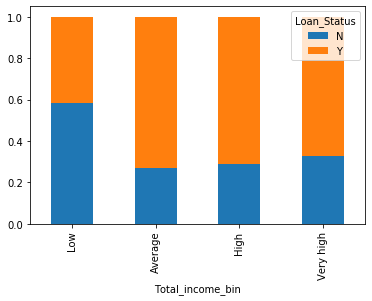

In [25]:
## combine applicant income and coapplicant income
train['Total_income'] = train['ApplicantIncome']+train['CoapplicantIncome']

bins = [0,2500,4000,6000,81000]
group = ['Low', 'Average', 'High', 'Very high']
train['Total_income_bin'] = pd.cut(train['Total_income'], bins, labels = group)
Total_income_bin = pd.crosstab(train['Total_income_bin'],train['Loan_Status'])
Total_income_bin.div(Total_income_bin.sum(1).astype(float),axis = 0).plot(kind = 'bar', stacked = True)

We can say that proportion of approved loans is less for applicants having low Total income(Applicant income + coapplicant Income) as compared to that of applicants with Average, high and very high Total_income.

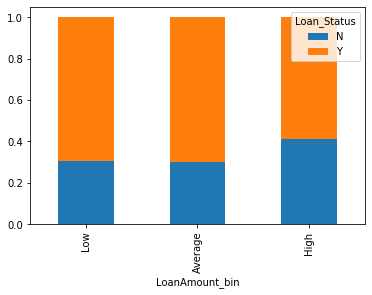

In [26]:
## Now lets visualise proportion of loan amount vs loan status

bins = [0,100,300, 700]
groups = ['Low', 'Average', 'High']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'], bins, labels = groups)
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis = 0).plot(kind = 'bar', stacked = True)

It can be infered as proportion of approved loan is higher for low and average loan amount as compared to higher loan amount value. this supports our hypothesis that loan approval chances is higher for less loan amount.

In [27]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Total_income,Total_income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Average,6091.0,Very high,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,NaN,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,NaN,6000.0,High,Average


In [28]:
train.drop(['Income_bin', 'Total_income', 'Total_income_bin', 'LoanAmount_bin'], axis = 1, inplace = True)
train['Dependents'].replace('3+',3, inplace = True)
train['Loan_Status'].replace('Y',1, inplace = True)
train['Loan_Status'].replace('N',0, inplace = True)

In [29]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


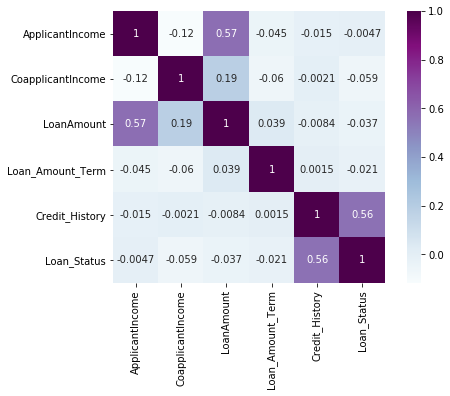

In [30]:
## Now lets try to find out the correlation between all numerical variables.

plt.figure(figsize = (8,5))
sns.heatmap(train.corr(), square = True, annot = True, cmap = 'BuPu' )

We see that the most correlated variables are 

1) ApplicantIncome and LoanAmount  

2) Credit_History and Loan_Status. LoanAmount is also slightly correlated with CoapplicantIncome



In [31]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Here we see their are lot of missing values in our dataset i.e Gender has 13, Married has 3, Dependents has 15, Self_Employed has 32, LoanAmount has 22, Loan_Amount_Term has 14, Credit_History has 50 missing values.

For numerical variables we can use mean or median values to treat missing values. For categorical variables we can use mode values.

In [32]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace = True)
train['Married'].fillna(train['Married'].mode()[0], inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)

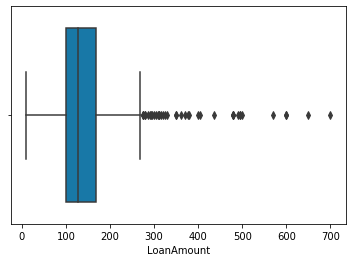

In [33]:
sns.boxplot('LoanAmount', data = train, palette = 'winter')

As we see there are lot of outliers in LoanAmount variable so it to fill missing values with mean value will not be proper. Hence we will use median value to fill missing values im LoanAmount variable.

In [34]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace = True)

In [35]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

So now as we can see that we handle all the missing values of train dataset, now similarly we will do this for test dataset.

In [36]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History        0
Property_Area         0
dtype: int64

In [37]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace = True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace = True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace = True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace = True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace = True)

In [38]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Now we can see we handle with all the mssing values in our dataset. Now we have to deal with outliers in dataset

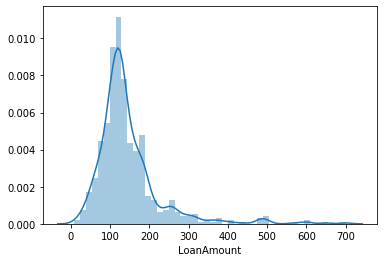

In [39]:
sns.distplot(train['LoanAmount'])

As we can see above distplot, the LoanAmount variable is right skewed. It is right skewed because of the outliers. One way to remove the skewness is by doing log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get the distribution similar to normal distribution.

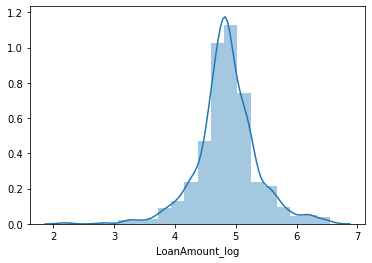

In [40]:
## Apply log transformation on train dataset.
train['LoanAmount_log'] = np.log(train['LoanAmount'])
sns.distplot(train['LoanAmount_log'], bins = 20)

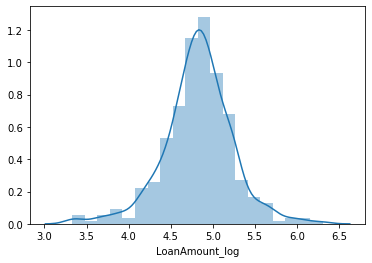

In [41]:
## Apply similar log transformation on test data also.
test['LoanAmount_log'] = np.log(test['LoanAmount'])
sns.distplot(test['LoanAmount_log'], bins = 20)

Now the distribution looks much closer to normal distribution for both train and test data.



In [42]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760


In [43]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709


Let us make our first model to predict the target variable. We will start with logistic regression which is used to predict binary outcome

In [44]:
train = train.drop('LoanAmount_log', axis = 1)
test = test.drop('LoanAmount_log', axis = 1)

In [45]:
train = train.drop('Loan_ID', axis = 1)
test = test.drop('Loan_ID', axis = 1)

In [46]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [47]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [48]:
x = train.iloc[:,:-1]
y = train.iloc[:,-1]

In [49]:
x.shape, y.shape

((614, 11), (614,))

In [50]:
x = pd.get_dummies(x)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [51]:
x.shape, train.shape, test.shape

((614, 20), (614, 21), (367, 20))

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
model = LogisticRegression()
model.fit(x_train, y_train)
LogisticRegression(C = 1.0, class_weight = None, dual = False, fit_intercept = True, intercept_scaling = 1, 
                   max_iter = 100, multi_class = 'ovr', n_jobs = 1, penalty = '12', random_state = 1, solver = 'liblinear',
                  tol = 0.0001, verbose = 0, warm_start = False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='12', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [54]:
pred_test = model.predict(x_test)

In [55]:
accuracy_score(y_test, pred_test)

0.7945945945945946

So our predictions are almost 79% accurate, i.e. we have identified 79% of the loan status correctly.

Now we can also make use of cross validation to validate our predictions. So lets import StratifiedKFold from sklearn and fit the model.

In [56]:
from sklearn.model_selection import StratifiedKFold
cv_score = []
i = 1
kf = StratifiedKFold(n_splits= 5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(x, y):
    print('{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = x.loc[train_index], x.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    cv_score.append(score)
    i+=1

1 of kfold 5
accuracy_score 0.8048780487804879
2 of kfold 5
accuracy_score 0.8373983739837398
3 of kfold 5
accuracy_score 0.7967479674796748
4 of kfold 5
accuracy_score 0.8130081300813008
5 of kfold 5
accuracy_score 0.8032786885245902


In [57]:
 np.array(cv_score).mean()

0.8110622417699587

Here by using StratifiedKFold cross validation we evaluate performance of our model and we get near about 81% accuracy. And the minimum score we get 80% accuracy and maximum score we get 84% accuracy

In [62]:
pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:,1]

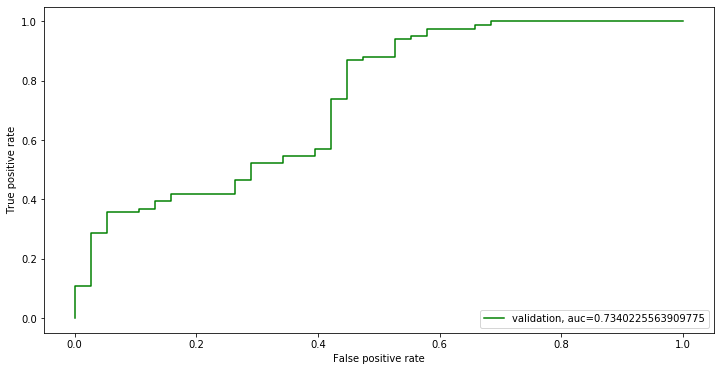

In [63]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,6))
plt.plot(fpr, tpr, '-g', label = 'validation, auc='+str(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc = 4)

we got an auc value of 0.73

Now based on domain knowledge, we can come up with new features that might affect target variable. we will create following three new features:
    
   1) Total Income: As created above we will combine both ApplicantIncome and CoApplicantIncome features. If the total income is high, chances of loan approval might be high.
   
   2) EMI: EMI is the monthly amount to be paid by the applicant to repay the loan. The main point behind making this new feature is that people who have high EMI's might find it difficult to pay back the loan. And we can easily calculate the EMI by dividing Loan Amount with loan amount term.
   
   3) Balance Income: This feature helps us to find income left after the EMI has been paid. If the balance income is high for applicant there are more chances for repaying the loan and hence chances of loan approval are high.

In [64]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

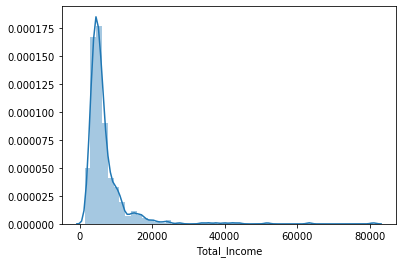

In [65]:
sns.distplot(train['Total_Income'])

Here in the above distplot we can see that the tail is much towards right i.e. the distribution is right skewed. so lets take log transformation to make distribution normal.

In [66]:
train['Total_income_log'] = np.log(train['Total_Income'])
test['Total_income_log'] = np.log(test['Total_Income'])

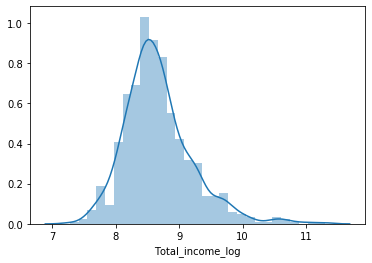

In [67]:
sns.distplot(train['Total_income_log'])

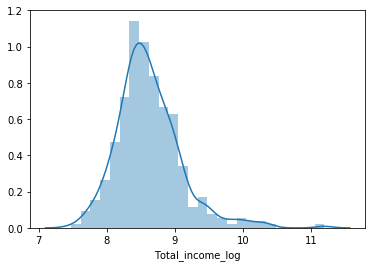

In [68]:
sns.distplot(test['Total_income_log'])

Now the distribution not exactly looks normal but much closer to noraml distribution. Now lets create EMI feature.

In [69]:
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount']/test['Loan_Amount_Term']

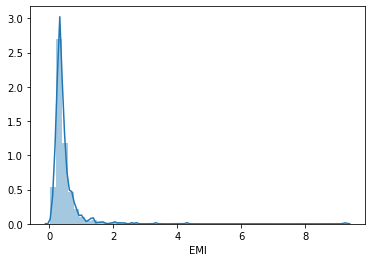

In [70]:
sns.distplot(train['EMI'])

In [71]:
train['EMI_log'] = np.log(train['EMI'])
test['EMI_log'] = np.log(test['EMI'])

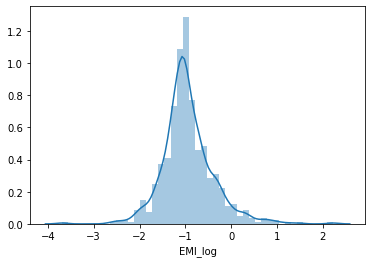

In [72]:
sns.distplot(train['EMI_log'])

In [73]:
train['Balance_Income'] = train['Total_Income'] - (train['EMI']*1000)
## Here we multiply EMI feature with 1000 to make units equal.
test['Balance_Income'] = test['Total_Income'] - (test['EMI']*1000)

In [74]:
train['Balance_Income'].head()

0    5493.444444
1    5735.444444
2    2816.666667
3    4607.666667
4    5608.333333
Name: Balance_Income, dtype: float64

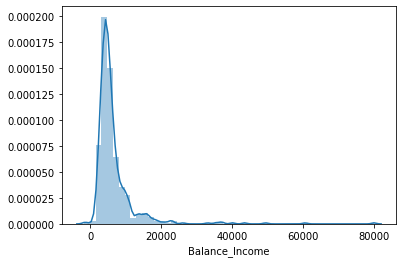

In [75]:
sns.distplot(train['Balance_Income'])

In [76]:
train.drop('Balance_Income', axis = 1, inplace = True)
test.drop('Balance_Income', axis = 1, inplace=True)

In [77]:
train.drop('EMI_log', axis = 1, inplace= True)
test.drop('EMI_log', axis = 1, inplace= True)

In [78]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_income_log,EMI
0,5849,0.0,128.0,360.0,1.0,1,0,1,1,0,...,1,0,1,0,0,0,1,5849.0,8.674026,0.355556
1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,...,1,0,1,0,1,0,0,6091.0,8.714568,0.355556
2,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,...,1,0,0,1,0,0,1,3000.0,8.006368,0.183333
3,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,...,0,1,1,0,0,0,1,4941.0,8.505323,0.333333
4,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,...,1,0,1,0,0,0,1,6000.0,8.699515,0.391667


In [79]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_income_log,EMI
0,5720,0,110.0,360.0,1.0,0,1,0,1,1,...,1,0,1,0,0,0,1,5720,8.651724,0.305556
1,3076,1500,126.0,360.0,1.0,0,1,0,1,0,...,1,0,1,0,0,0,1,4576,8.428581,0.350000
2,5000,1800,208.0,360.0,1.0,0,1,0,1,0,...,1,0,1,0,0,0,1,6800,8.824678,0.577778
3,2340,2546,100.0,360.0,1.0,0,1,0,1,0,...,1,0,1,0,0,0,1,4886,8.494129,0.277778
4,3276,0,78.0,360.0,1.0,0,1,1,0,1,...,0,1,1,0,0,0,1,3276,8.094378,0.216667


Let us now drop the original variables of the dataset from which we have created new features. Reason for dropping this original variables because of the correlation between those old features and these new features will be very high and our model assumes that variables are not highly correlated. so we have to remove correlated features from the dataset.

In [81]:
train = train.drop(['ApplicantIncome', 'Total_income_log', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis = 1)
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'Total_income_log', 'LoanAmount', 'Loan_Amount_Term'], axis = 1)

In [91]:
train = train.drop(['Dependents_3', 'Dependents_0', 'Dependents_1', 'Dependents_2'], axis = 1)
test = test.drop(['Dependents_3+', 'Dependents_0', 'Dependents_1', 'Dependents_2'], axis = 1)

In [96]:
train = train.drop(['Education_Graduate', 'Education_Not Graduate'], axis = 1)
test = test.drop(['Education_Graduate', 'Education_Not Graduate'], axis = 1)

In [100]:
train = train.drop(['Self_Employed_No', 'Self_Employed_Yes'], axis = 1)
test = test.drop(['Self_Employed_No', 'Self_Employed_Yes'], axis = 1)

In [101]:
train.head()

,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,EMI
0,1.0,1,0,1,1,0,0,0,1,5849.0,0.355556
1,1.0,0,0,1,0,1,1,0,0,6091.0,0.355556
2,1.0,1,0,1,0,1,0,0,1,3000.0,0.183333
3,1.0,1,0,1,0,1,0,0,1,4941.0,0.333333
4,1.0,1,0,1,1,0,0,0,1,6000.0,0.391667


In [102]:
test.head()

,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,EMI
0,1.0,0,1,0,1,0,0,1,5720,0.305556
1,1.0,0,1,0,1,0,0,1,4576,0.350000
2,1.0,0,1,0,1,0,0,1,6800,0.577778
3,1.0,0,1,0,1,0,0,1,4886,0.277778
4,1.0,0,1,1,0,0,0,1,3276,0.216667


So now we created new features and now we can continue the model building process. So we will start logistic regression model and then move further to more models like RandomForest and XGBoost.

In [103]:
x = train.drop('Loan_Status', axis = 1)
y = train.Loan_Status

In [104]:
x.shape, y.shape

((614, 10), (614,))

### Logistic Regression 

In [105]:
cv = []
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(x, y):
    print('{} of kfold {}'. format(i, kf.n_splits))
    xtr, xvl = x.loc[train_index], x.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    cv.append(score)
    print('accuracy_score', score)
    i+=1

1 of kfold 5
accuracy_score 0.7398373983739838
2 of kfold 5
accuracy_score 0.8373983739837398
3 of kfold 5
accuracy_score 0.7886178861788617
4 of kfold 5
accuracy_score 0.8048780487804879
5 of kfold 5
accuracy_score 0.7868852459016393


In [106]:
np.array(cv).mean()

0.7915233906437426

The mean validation accuracy for this model is 79%

In [107]:
pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:,1]

By adding new features we get the same accuracy score as when get before adding new features. So now we can try different algorithms to improve our accuracy.

### Decision Tree 

In [108]:
from sklearn import tree

In [109]:
## here also we will fit the decision tree model with cross validation
score_cv = []
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(x, y):
    print('{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = x.loc[train_index], x.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    score_cv.append(score)
    print('accuracy_score', score)
    i+=1
    print('mean score for 5 kfold is: ', np.array(score_cv).mean())

1 of kfold 5
accuracy_score 0.7886178861788617
mean score for 5 kfold is:  0.7886178861788617
2 of kfold 5
accuracy_score 0.7073170731707317
mean score for 5 kfold is:  0.7479674796747967
3 of kfold 5
accuracy_score 0.6910569105691057
mean score for 5 kfold is:  0.7289972899728997
4 of kfold 5
accuracy_score 0.7073170731707317
mean score for 5 kfold is:  0.7235772357723578
5 of kfold 5
accuracy_score 0.6557377049180327
mean score for 5 kfold is:  0.7100093296014928


here we get the mean validation accuracy for decision tree classifier model as 71%
 
 Here we get lesser accuracy than our logistic regression model so lets build another model for better accuracy.

### Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier
Random_cv = []
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(x,y):
    print('{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = x.loc[train_index], x.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model = RandomForestClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    Random_cv.append(score)
    print('accuracy_score', score)
    i+=1
    print('mean score', np.array(Random_cv).mean())

1 of kfold 5
accuracy_score 0.8292682926829268
mean score 0.8292682926829268
2 of kfold 5
accuracy_score 0.7723577235772358
mean score 0.8008130081300813
3 of kfold 5
accuracy_score 0.7398373983739838
mean score 0.7804878048780487
4 of kfold 5
accuracy_score 0.7967479674796748
mean score 0.7845528455284553
5 of kfold 5
accuracy_score 0.7295081967213115
mean score 0.7735439157670265


The mean validation for Randomforest Classifier is 77%

Now will try to improve accuracy by tunning the hyperparameters for this model. We will use GridSearchCv to get the optimised values of hyperparameters.

We will tune the max_depth and n_estimators parameters. max_depth decides the maximum depth of the tree and n_estimators decides the number of trees that will be used in random forest model.


In [111]:
from sklearn.model_selection import GridSearchCV

Now we will provide the range max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators.

In [112]:
paramgrid = {'max_depth': list(range(1,20,2)), 'n_estimators': list(range(1,200,20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=1)
grid_search.fit(x_train, y_train)
GridSearchCV(error_score='raise', estimator=RandomForestClassifier(bootstrap = True, criterion = 'gini', 
                                                                   max_features = 'auto', min_impurity_decrease=0.0, min_samples_leaf=1,
                                                                  min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators= 10,
                                                                  n_jobs=1, oob_score = False, random_state=1, verbose = 0, warm_start = False),
            iid=True, n_jobs=1, param_grid={'max_depth': [1,3,5,7,9,11,13,15,17,19],'n_estimators': [1,21,41,61,81,101,121,141,161,181]},
            pre_dispatch='2*n_jobs', refit=True, return_train_score='warn', verbose=0)

GridSearchCV(cv=None, error_score='raise',
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=1,
                                              oob_score=False, random_state=1,
                                

In [113]:
print(grid_search.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=21,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


In [114]:
print(grid_search.best_params_)

{'max_depth': 3, 'n_estimators': 21}


So from hyperparameter tunning we get the optimized value for max_depth variable is 3 and for n_estimators is 21. Now lets build the model using these optimized values.

In [115]:
Random_cv_hyper = []
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(x,y):
    print('{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = x.loc[train_index], x.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=5, n_estimators=21)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    Random_cv.append(score)
    print('accuracy_score', score)
    i+=1
    print('mean score', np.array(Random_cv).mean())
    pred_test = model.predict(test)
    pred2 = model.predict_proba(test)[:,1]

1 of kfold 5
accuracy_score 0.8211382113821138
mean score 0.7814762983695411
2 of kfold 5
accuracy_score 0.8373983739837398
mean score 0.7894651663144268
3 of kfold 5
accuracy_score 0.7967479674796748
mean score 0.7903755164600826
4 of kfold 5
accuracy_score 0.8048780487804879
mean score 0.7919869089401277
5 of kfold 5
accuracy_score 0.7950819672131147
mean score 0.7922964147674263


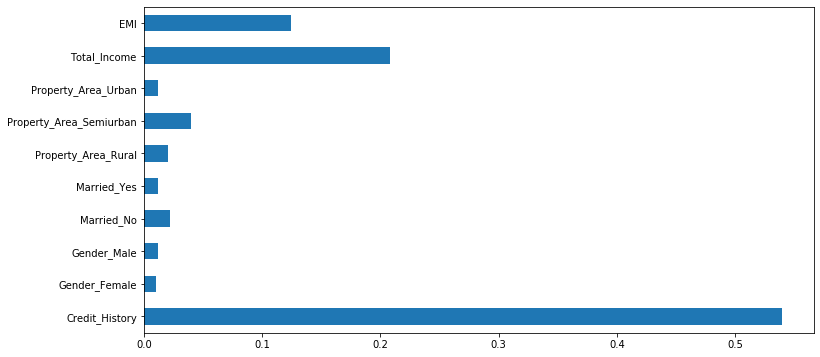

In [116]:
imp_features = pd.Series(model.feature_importances_, index=x.columns)
imp_features.plot(kind = 'barh', figsize = (12,6))

From above plot we can see that credit history is the most important feature followed by Balance income, Total income, EMI. Hence adding new features helped us in predicting our target variable.

### XGBoost

In [117]:
from xgboost import XGBClassifier

In [118]:
xgb_cv = []
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(x,y):
    print('{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = x.loc[train_index], x.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    Random_cv.append(score)
    print('accuracy_score', score)
    i+=1
    print('mean score', np.array(Random_cv).mean())
    pred_test = model.predict(test)
    pred2 = model.predict_proba(test)[:,1]

1 of kfold 5
accuracy_score 0.8130081300813008
mean score 0.7941792979777786
2 of kfold 5
accuracy_score 0.8536585365853658
mean score 0.7991359011950775
3 of kfold 5
accuracy_score 0.7967479674796748
mean score 0.7989522139862004
4 of kfold 5
accuracy_score 0.8048780487804879
mean score 0.7993754879000781
5 of kfold 5
accuracy_score 0.7950819672131147
mean score 0.7990892531876138


This model gives accuracy of 80%.

In [119]:
import pickle
file = open('XGBoost1.pkl', 'wb')
pickle.dump(model, file)